In [60]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans          #Kmeans
from sklearn.mixture import GaussianMixture #EM
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA            #PCA
from sklearn.decomposition import FastICA        #ICA
from sklearn.decomposition import FactorAnalysis #FA
from sklearn import random_projection            #RP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import scipy

import time

In [65]:
def em(X_train, X_test, y_train, y_test, init_means, no_iter = 1000, component_list = [3,4,5,6,7,8,9,10,11], num_class = 7, toshow = 1):


	array_aic = []
	array_bic = []
	array_homo =[]
	array_comp = []
	array_sil = []
	array_avg_log = []


	for num_classes in component_list:

		clf = GaussianMixture(n_components=num_classes,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')
		#     clf = KMeans(n_clusters= num_classes, init='k-means++')

		clf.fit(X_train)

		y_test_pred = clf.predict(X_test)
		#Per sample average log likelihood
		avg_log = clf.score(X_test)
		array_avg_log.append(avg_log)


		#AIC on the test data
		aic = clf.aic(X_test)
		array_aic.append(aic)

		#BIC on the test data
		bic = clf.bic(X_test)
		array_bic.append(bic)

		#Homogenity score on the test data
		homo = metrics.homogeneity_score(y_test, y_test_pred)
		array_homo.append(homo)

		#Completeness score
		comp = metrics.completeness_score(y_test, y_test_pred)
		array_comp.append(comp)

		#Silhoutette score
		sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
		array_sil.append(sil)


	#Generating plots

	fig1,ax1 = plt.subplots()
	ax1.plot(component_list, array_aic)
	ax1.plot(component_list, array_bic)
	plt.legend(['AIC', 'BIC'])
	plt.xlabel('Number of clusters')
	plt.title('AIC/BIC curve for Expected Maximization')

	fig2,ax2 = plt.subplots()
	ax2.plot(component_list, array_homo)
	ax2.plot(component_list, array_comp)
	ax2.plot(component_list, array_sil)
	plt.legend(['homogenity','completeness','silhoutette'])
	plt.xlabel('Number of clusters')
	plt.title('Performance evaluation scores for Expected Maximization')


	fig3, ax3 = plt.subplots()
	ax3.plot(component_list, array_avg_log)
	plt.xlabel('Number of clusters')
	plt.title('Per sample average log likelihood for Expected Maximization')


	if(toshow == 1):
		plt.show()

	#Training and testing accuracy for K = number of classes
	
	clf = GaussianMixture(n_components=num_class ,covariance_type='spherical', max_iter=no_iter, init_params= 'kmeans')

	#Assigning the initial means as the mean feature vector for the class
	clf.means_init = init_means

	clf.fit(X_train)

	#Training accuracy
	y_train_pred = clf.predict(X_train)
	train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
	print('Training accuracy for Expected Maximization for K = {}:  {}'.format(num_class, train_accuracy))

	#Testing accuracy
	y_test_pred = clf.predict(X_test)
	test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
	print('Testing accuracy for Expected Maximization for K = {}:  {}'.format(num_class, test_accuracy))

	return component_list, array_aic, array_bic, array_homo, array_comp, array_sil, array_avg_log

	
def kmeans(X_train, X_test, y_train, y_test, init_means, no_iter = 1000, component_list =[3,4,5,6,7,8,9,10,11], num_class = 7, toshow=  1):

	array_homo =[]
	array_comp = []
	array_sil = []
	array_var = []

	for num_classes in component_list:
	    
	    clf = KMeans(n_clusters= num_classes, init='k-means++')
	    
	    clf.fit(X_train)
	    
	    y_test_pred = clf.predict(X_test)
	    
	      
	    #Homogenity score on the test data
	    homo = metrics.homogeneity_score(y_test, y_test_pred)
	    array_homo.append(homo)
	    
	    #Completeness score
	    comp = metrics.completeness_score(y_test, y_test_pred)
	    array_comp.append(comp)
	    
	    #Silhoutette score
	    sil = metrics.silhouette_score(X_test, y_test_pred, metric='euclidean')
	    array_sil.append(sil)

	    #Variance explained by the cluster
	    var = clf.score(X_test)
	    array_var.append(var)
	    
	    

	#Generating plots
	fig4,ax4 = plt.subplots()
	ax4.plot(component_list, array_homo)
	ax4.plot(component_list, array_comp)
	ax4.plot(component_list, array_sil)
	plt.legend(['homogenity','completeness','silhoutette'])
	plt.xlabel('Number of clusters')
	plt.title('Performance evaluation scores for KMeans')


	fig5, ax5 = plt.subplots()
	ax5.plot(component_list, array_var)
	plt.title('Variance explained by each cluster for KMeans')
	plt.xlabel('Number of cluster')

	if(toshow == 1):

		plt.show()


	#Training and testing accuracy for K = num_class

	#Assigning the initial means as the mean feature vector for the class
	init_mean = init_means
	clf = KMeans(n_clusters= num_class, init = init_mean)

	clf.fit(X_train)

	#Training accuracy
	y_train_pred = clf.predict(X_train)
	train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
	print('Training accuracy for KMeans for K = {}:  {}'.format(num_class, train_accuracy))

	#Testing accuracy
	y_test_pred = clf.predict(X_test)
	test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
	print('Testing accuracy for KMeans for K = {}:  {}'.format(num_class, test_accuracy))


	return component_list, array_homo, array_comp, array_sil, array_var

##  data load & preprocessiong

In [7]:
data = load_breast_cancer()
X, y = data.data, data.target
random_seed = 0
np.random.seed(random_seed)

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, stratify = data.target, random_state=random_seed)

# Dimensionality Reduction

## 1. PCA

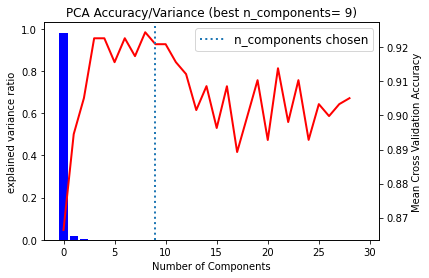

In [33]:
dt = DecisionTreeClassifier(criterion='gini', max_depth = 15, min_samples_split = 5)
pca = PCA()
pipe = Pipeline(steps = [('pca',pca),('decisionTree', dt)])

pca.fit(X)
fig, ax = plt.subplots()
ax.bar(np.arange(X.shape[1]), pca.explained_variance_ratio_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('Number of Components')
ax.set_ylabel('explained variance ratio')

n_components = range(1, X.shape[1])
gridSearch = GridSearchCV(pipe, dict(pca__n_components=n_components),cv=3)
gridSearch.fit(X,y)
best_n = gridSearch.best_estimator_.named_steps['pca'].n_components
results = gridSearch.cv_results_
ax1 = ax.twinx()


ax1.plot(results['mean_test_score'],linewidth=2, color ='red')
ax1.set_ylabel('Mean Cross Validation Accuracy')
ax1.axvline(best_n,linestyle=':',label ='n_components chosen',linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('PCA Accuracy/Variance (best n_components= %d)'%best_n)
plt.show()



#### Reconstrunction Error

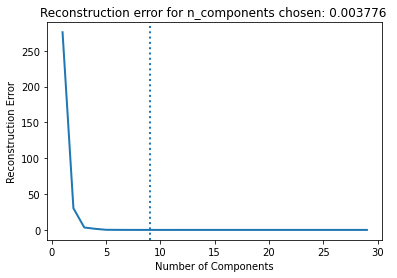

In [38]:
reconstruction_error = []
for comp in n_components:
    pca = PCA(n_components = comp)
    X_transformed = pca.fit_transform(X_train)
    X_projected = pca.inverse_transform(X_transformed)
    reconstruction_error.append(((X_train-X_projected)**2).mean())
    
    if(comp==best_n):
        chosen_error = ((X_train-X_projected)**2).mean()
fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth=2)
ax2.axvline(best_n,linestyle=':',label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen: %f '%chosen_error)
plt.show()

#### Clustering after PCA

KMeans


<ipython-input-44-b54e582e331d>:156: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  clf.fit(X_train)


Training accuracy for KMeans for K = 2:  84.74178403755869
Testing accuracy for KMeans for K = 2:  86.01398601398601
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  91.07981220657277
Testing accuracy for Expected Maximization for K = 2:  90.20979020979021


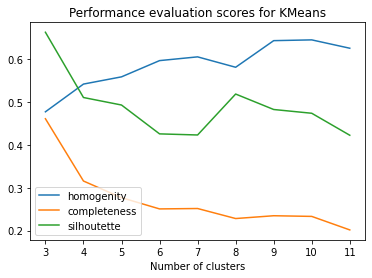

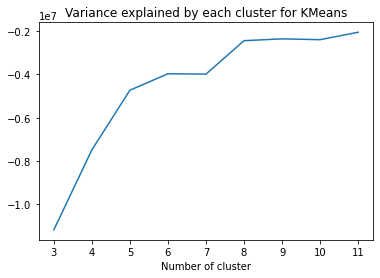

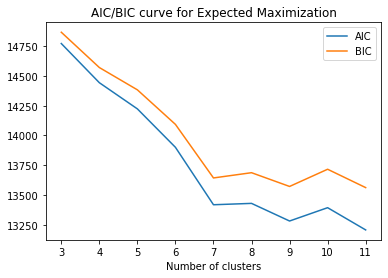

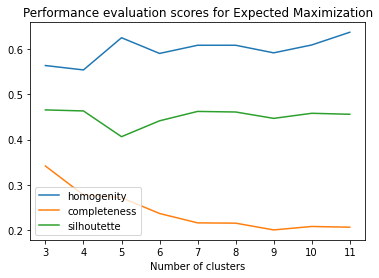

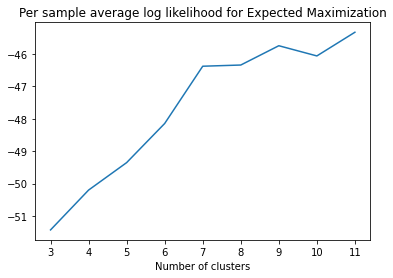

In [45]:
pca_new = PCA(n_components = best_n)
pca_new.fit(X,y)
X_transformed=pca_new.transform(X)
X_train_transformed=pca_new.transform(X_train)
X_test_transformed=pca_new.transform(X_test)
means_init=np.array([X_transformed[y==i].mean(axis=0) for i in range(2)])

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = \
   kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow =0)


print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = \
 em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow =0)



## 2. ICA

C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.wa

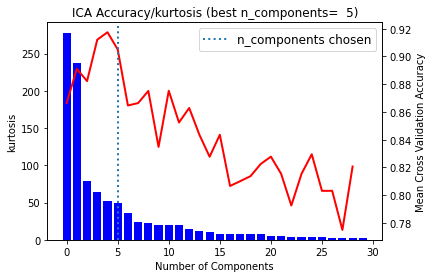

In [48]:
def _calculate(X, ica_, n_components):
    components = ica_.components_
    ica_.components_ = components[:n_components]
    transformed = ica_.transform(X)
    ica_.components_ = components
    kurtosis = scipy.stats.kurtosis(transformed)
    return sorted(kurtosis, reverse = True)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
ica = FastICA()
pipe = Pipeline(steps=[('ica', ica), ('decisionTree', dt)])

ica.fit(X)

fig, ax = plt.subplots()
ax.bar(np.arange(X.shape[1]), _calculate(X,ica, X.shape[1]) , linewidth=2, color = 'blue')

plt.axis('tight')
plt.xlabel('Number of Components')
ax.set_ylabel('kurtosis')

#Checking the accuracy for taking all combination of components
n_components = range(1, X.shape[1])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(ica__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
ax1 = ax.twinx()

#Plotting the accuracies and best component
ax1.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax1.set_ylabel('Mean Cross Validation Accuracy')
ax1.axvline(gridSearch.best_estimator_.named_steps['ica'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy/kurtosis (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['ica'].n_components )
plt.show()


#Reducing the dimensions with optimal number of components
ica_new = FastICA(n_components = gridSearch.best_estimator_.named_steps['ica'].n_components)
ica_new.fit(X_train)
X_train_transformed = ica_new.transform(X_train)
X_test_transformed = ica_new.transform(X_test)

Calculating Reconstruction Error


C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:118: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn('FastICA did not converge. Consider increasing '


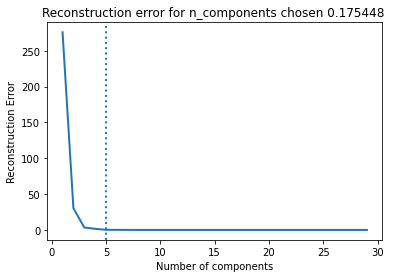

In [49]:
print("Calculating Reconstruction Error")


reconstruction_error = []
for comp in n_components:
    ica = FastICA(n_components = comp)
    X_transformed = ica.fit_transform(X_train)
    X_projected = ica.inverse_transform(X_transformed)
    reconstruction_error.append(((X_train - X_projected) ** 2).mean())

    if(comp == gridSearch.best_estimator_.named_steps['ica'].n_components):
        chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['ica'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
plt.show()

Clustering ICA
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  78.16901408450704
Testing accuracy for Expected Maximization for K = 2:  77.62237762237763
KMeans
Training accuracy for KMeans for K = 2:  87.55868544600939
Testing accuracy for KMeans for K = 2:  88.11188811188812


<ipython-input-44-b54e582e331d>:156: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  clf.fit(X_train)


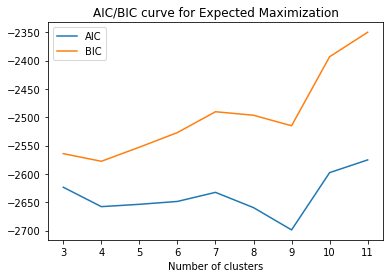

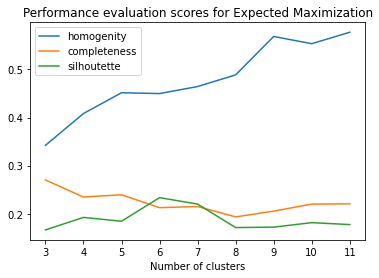

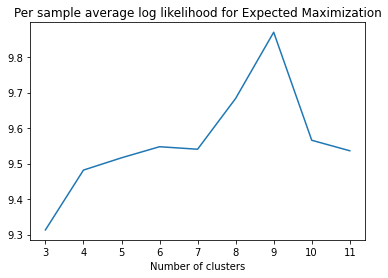

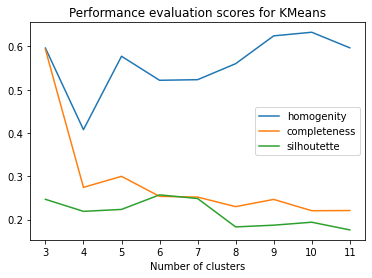

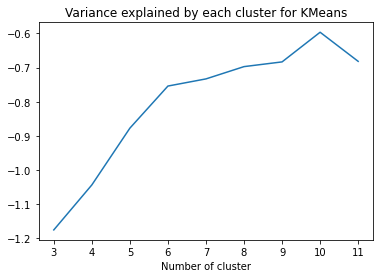

In [51]:
#Dimensionally reduce the full dataset
#Reducing the dimensions with optimal number of components
ica_new = FastICA(n_components = gridSearch.best_estimator_.named_steps['ica'].n_components)
ica_new.fit(X)
X_transformed_f = ica_new.transform(X)

#Clustering after dimensionality reduction
print("Clustering ICA")

means_init = np.array([X_transformed_f[y == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = \
    em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow =0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = \
    kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)

## 3. Random Projections (RP)

Starting RP
Dimensionality reduction


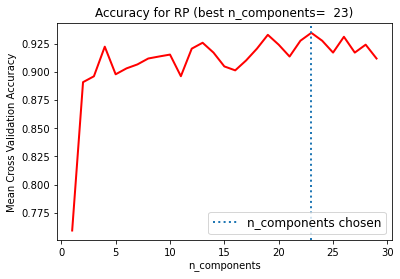

In [52]:
print("Starting RP")
print("Dimensionality reduction")


decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
rp = random_projection.GaussianRandomProjection(n_components = X.shape[1])

pipe = Pipeline(steps=[('rp', rp), ('decisionTree', decisiontree)])

rp.fit(X)

fig, ax = plt.subplots()

#Checking the accuracy for taking all combination of components
n_components = range(1, X.shape[1])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(rp__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_

#Plotting the accuracies and best component
plt.plot(n_components, results['mean_test_score'], linewidth = 2, color = 'red')
plt.ylabel('Mean Cross Validation Accuracy')
plt.xlabel('n_components')
ax.axvline(gridSearch.best_estimator_.named_steps['rp'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('Accuracy for RP (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['rp'].n_components )
plt.show()


#Reducing the dimensions with optimal number of components
rp_new = random_projection.GaussianRandomProjection(n_components = gridSearch.best_estimator_.named_steps['rp'].n_components)
rp_new.fit(X_train)
X_train_transformed = rp_new.transform(X_train)
X_test_transformed = rp_new.transform(X_test)

Calculating Reconstruction Error


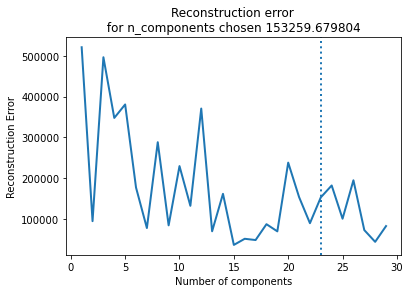

In [56]:
#Reconstruction Error

print("Calculating Reconstruction Error")

def inverse_transform_rp(rp, X_transformed, X_train):
    return X_transformed.dot(rp.components_) + np.mean(X_train, axis = 0)

reconstruction_error = []
for comp in n_components:
    rp = random_projection.GaussianRandomProjection(n_components = comp)
    X_transformed = rp.fit_transform(X_train)
    X_projected = inverse_transform_rp(rp, X_transformed, X_train)
    reconstruction_error.append(((X_train - X_projected) ** 2).mean())

    if(comp == gridSearch.best_estimator_.named_steps['rp'].n_components):
        chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['rp'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error \n for n_components chosen %f '%chosen_error)
plt.show()

Clustering RP
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  62.676056338028175
Testing accuracy for Expected Maximization for K = 2:  62.93706293706294
KMeans
Training accuracy for KMeans for K = 2:  84.74178403755869
Testing accuracy for KMeans for K = 2:  86.7132867132867


<ipython-input-44-b54e582e331d>:156: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  clf.fit(X_train)


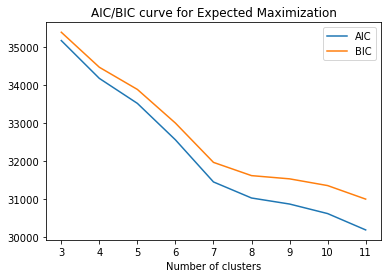

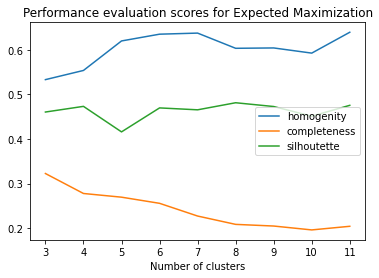

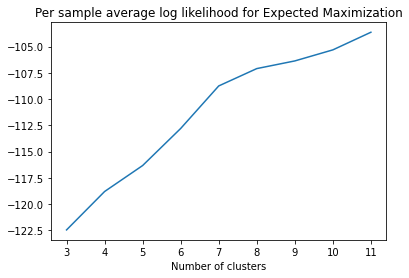

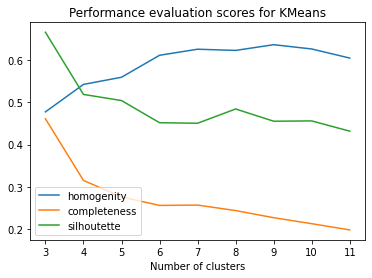

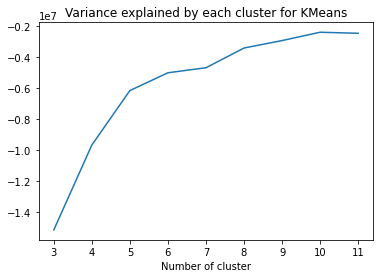

In [57]:
#Clustering after dimensionality reduction

#clustering experiments
rp_new = random_projection.GaussianRandomProjection(n_components = gridSearch.best_estimator_.named_steps['rp'].n_components)
rp_new.fit(X)
X_transformed_f = rp_new.transform(X)

means_init = np.array([X_transformed_f[y == i].mean(axis=0) for i in range(2)])

print("Clustering RP")

print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = \
    em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = \
    kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2,toshow = 0)

## 4. Factor analysis (FA)

Starting FA
Dimensionality reduction
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29] [5.36580187e-02 9.90717922e-01 9.64907320e-01 9.99964530e-01
 1.62405073e-04 1.31595314e-03 2.46887802e-03 3.40673967e-04
 6.24877244e-04 3.91346926e-05 5.93903985e-03 1.87668840e-01
 2.92284284e-01 9.98474300e-01 7.21835617e-06 2.39037010e-04
 7.70679116e-04 2.54887041e-05 5.58564501e-05 6.19405709e-06
 1.41721606e-01 9.90542607e-01 9.88050686e-01 9.99957099e-01
 4.04469805e-04 1.18571269e-02 2.11294493e-02 1.09852535e-03
 2.80165455e-03 2.42114799e-04]


C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not conve

C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not conve

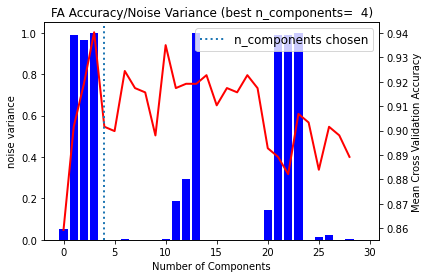

In [61]:
from sklearn.decomposition import FactorAnalysis
print("Starting FA")
print("Dimensionality reduction")

decisiontree = DecisionTreeClassifier(criterion = 'gini', max_depth = 15, min_samples_split = 5)
fa = FactorAnalysis(max_iter = 100)

pipe = Pipeline(steps=[('fa', fa), ('decisionTree', decisiontree)])

fa.fit(X)

fig, ax = plt.subplots()
print(list(range(1,X.shape[1])),fa.noise_variance_)
ax.bar(np.arange(X.shape[1]), fa.noise_variance_, linewidth=2, color = 'blue')
plt.axis('tight')
plt.xlabel('Number of Components')
ax.set_ylabel('noise variance')

#Checking the accuracy for taking all combination of components
n_components = range(1, X.shape[1])
# Parameters of pipelines can be set using ‘__’ separated parameter names:
gridSearch = GridSearchCV(pipe, dict(fa__n_components=n_components), cv = 3)
gridSearch.fit(X, y)
results = gridSearch.cv_results_
ax1 = ax.twinx()

#Plotting the accuracies and best component
ax1.plot(results['mean_test_score'], linewidth = 2, color = 'red')
ax1.set_ylabel('Mean Cross Validation Accuracy')
ax1.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)

plt.legend(prop=dict(size=12))
plt.title('FA Accuracy/Noise Variance (best n_components=  %d)'%gridSearch.best_estimator_.named_steps['fa'].n_components )
plt.show()

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X_train)
X_train_transformed = fa_new.transform(X_train)
X_test_transformed = fa_new.transform(X_test)

Calculating Reconstruction Error


C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not converge.' +
C:\Users\nfleming\Anaconda3\lib\site-packages\sklearn\decomposition\_factor_analysis.py:240: ConvergenceWarning: FactorAnalysis did not converge. You might want to increase the number of iterations.
  warnings.warn('FactorAnalysis did not conve

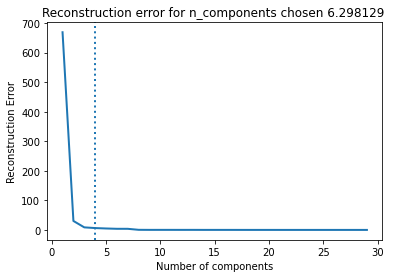

In [63]:
#Reconstruction Error

print("Calculating Reconstruction Error")

def inverse_transform_fa(fa, X_transformed, X_train):
    return X_transformed.dot(fa.components_) + np.mean(X_train, axis = 0)

reconstruction_error = []
for comp in n_components:
    fa = FactorAnalysis(n_components = comp, max_iter = 100)
    X_transformed = fa.fit_transform(X_train)
    X_projected = inverse_transform_fa(fa, X_transformed, X_train)
    reconstruction_error.append(((X_train - X_projected) ** 2).mean())
    if(comp == gridSearch.best_estimator_.named_steps['fa'].n_components):
        chosen_error = ((X_train - X_projected) ** 2).mean()

fig2,ax2 = plt.subplots()
ax2.plot(n_components, reconstruction_error, linewidth= 2)
ax2.axvline(gridSearch.best_estimator_.named_steps['fa'].n_components, linestyle=':', label='n_components chosen', linewidth = 2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction error for n_components chosen %f '%chosen_error)
plt.show()

Clustering FA
Expected Maximization
Training accuracy for Expected Maximization for K = 2:  87.32394366197182
Testing accuracy for Expected Maximization for K = 2:  85.3146853146853
KMeans
Training accuracy for KMeans for K = 2:  91.54929577464789
Testing accuracy for KMeans for K = 2:  88.81118881118881


<ipython-input-44-b54e582e331d>:156: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  clf.fit(X_train)


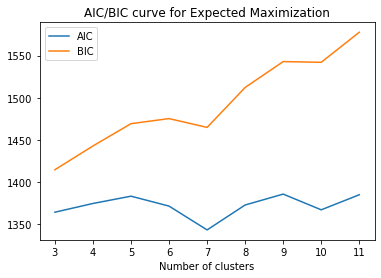

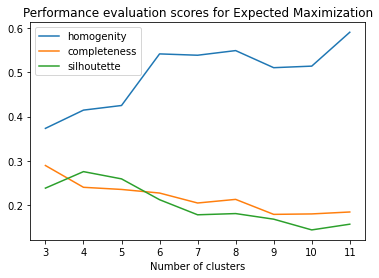

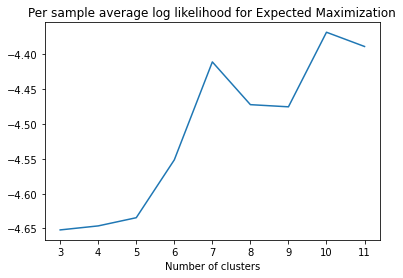

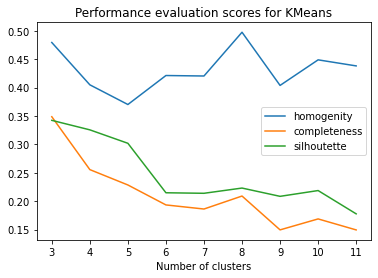

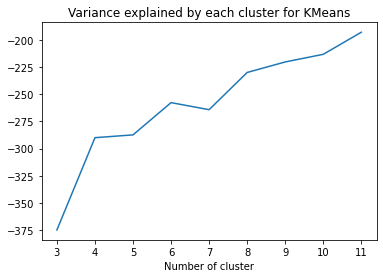

In [64]:
#Clustering after dimensionality reduction

print("Clustering FA")

#Reducing the dimensions with optimal number of components
fa_new = FactorAnalysis(n_components = gridSearch.best_estimator_.named_steps['fa'].n_components, max_iter = 100)
fa_new.fit(X)
X_transformed = fa_new.transform(X)

means_init = np.array([X_transformed[y == i].mean(axis=0) for i in range(2)])

#clustering experiments
print("Expected Maximization")
component_list, array_aic, array_bic, array_homo_1, array_comp_1, array_sil_1, array_avg_log = \
    em(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)

print("KMeans")
component_list, array_homo_2, array_comp_2, array_sil_2, array_var = \
    kmeans(X_train_transformed, X_test_transformed, y_train, y_test, init_means = means_init, component_list = [3,4,5,6,7,8,9,10,11], num_class = 2, toshow = 0)